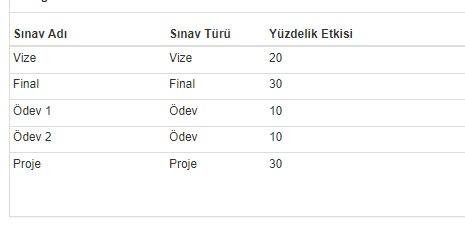

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize
from nltk import tokenize
import string
import regex as re

In [29]:
it_data = pd.read_csv('../../../Data/Jobs_IT.csv')
it_data.head()

,JobRefNo,DigerPozisyon,Qualifications,Classification
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri


In [30]:
it_data = pd.read_csv('../../Data/Jobs_IT.csv')
it_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/Jobs_IT.csv'

In [7]:
it_data.shape

(2500, 4)

In [8]:
it_data[(it_data['DigerPozisyon']  == 'Yazılım Geliştirme Elemanı') & (it_data['JobRefNo']  == 3433076)]

,JobRefNo,DigerPozisyon,Qualifications,Classification
1057,3433076,Yazılım Geliştirme Elemanı,"<ul color="""" color=""""><li>Microsoft .Net tekno...",Bilgi Teknolojileri


In [9]:
it_data['DigerPozisyon'] 

0                                   Bilgisayar Mühendisi
1                             Yazılım Geliştirme Elemanı
2                                       Grafik Tasarımcı
3                                   Full Stack Developer
4                              Multimedya Tasarım Uzmanı
                              ...                       
2495                                Bilgisayar Mühendisi
2496    Güvenlik Çözümleri Teknoloji Danışmanı(Presales)
2497                 Yazılım Geliştirme Birim Yöneticisi
2498                        Full-Stack Developer (Cloud)
2499                                    Grafik Tasarımcı
Name: DigerPozisyon, Length: 2500, dtype: object

In [10]:
it_data['DigerPozisyon'].value_counts()

Grafiker                              103
Grafik Tasarımcı                      100
Grafik Tasarım Uzmanı                  75
Bilgi İşlem Uzmanı                     65
Yazılım Geliştirme Uzmanı              53
                                     ... 
IT Sistem Destek Uzmanı                 1
Jun/Mid Full-Stack Developer            1
Bayi Kanalı Yöneticisi / Yönetmeni      1
SAP FI/CO Uzmanı                        1
Full-Stack Developer (Cloud)            1
Name: DigerPozisyon, Length: 1131, dtype: int64

In [11]:
it_data.iloc[10]['Qualifications']

'<p>GENEL NİTELİKLER VE İŞ TANIMI</p><ul type="disc"><li class="x_MsoNormal">Üniversitelerin Meslek Yüksek Okullarının Bilgisayar Teknolojileri veya Elektrik/Elektronik bölümlerinden mezun,</li></ul><ul type="disc"><li class="x_MsoNormal">Aşağıda belirtilen alanlarda en az 2 yıl deneyimli olmak üzere;</li></ul><ul type="disc"><li class="x_MsoNormal">En az 200 kullanıcılı bir altyapıda hizmette bulunma deneyimine sahip,</li><li class="x_MsoNormal">Tercihen CCNA veya MCSE sertifikalarından birine sahip, </li><li class="x_MsoNormal">Yazıcı ve network cihazlarının fiziksel kurulumları, arıza tespiti yapılması ve desteği, PC donanım, network protokolleri ve bileşenleri konusunda bilgi ve deneyim sahibi,</li><li class="x_MsoNormal">Windows işletim sistemleri, MS Office vb. programları kullanabilen ve kullanıcılara destek verebilecek,</li><li class="x_MsoNormal">Yeni ürün ve teknolojileri öğrenmeye istekli ve teknolojik yeniliklere kolay uyum sağlayabilen,</li><li class="x_MsoNormal">Seyahat 

In [12]:
it_data.iloc[10]['JobRefNo']

3463478

In [17]:
text = BeautifulSoup(it_data.iloc[10]['Qualifications']).get_text(' ')
text 

'GENEL NİTELİKLER VE İŞ TANIMI Üniversitelerin Meslek Yüksek Okullarının Bilgisayar Teknolojileri veya Elektrik/Elektronik bölümlerinden mezun, Aşağıda belirtilen alanlarda en az 2 yıl deneyimli olmak üzere; En az 200 kullanıcılı bir altyapıda hizmette bulunma deneyimine sahip, Tercihen CCNA veya MCSE sertifikalarından birine sahip,  Yazıcı ve network cihazlarının fiziksel kurulumları, arıza tespiti yapılması ve desteği, PC donanım, network protokolleri ve bileşenleri konusunda bilgi ve deneyim sahibi, Windows işletim sistemleri, MS Office vb. programları kullanabilen ve kullanıcılara destek verebilecek, Yeni ürün ve teknolojileri öğrenmeye istekli ve teknolojik yeniliklere kolay uyum sağlayabilen, Seyahat engeli olmayan,  B sınıfı ehliyeti olan ve aktif olarak araç kullanabilen, İletişim becerisi yüksek ve ekip çalışmasına yatkın,  Esnek çalışmaya uygun çalışma arkadaşı aramaktayız.  İŞ TANIMI Bilgisayar yazılım ve donanım kurulumlarının yapılması, Masaüstü ve taşınabilir bilgisayarla

In [111]:
BeautifulSoup(it_data.iloc[10]['Qualifications'].replace("</p>",".")).get_text(' ')

'GENEL NİTELİKLER VE İŞ TANIMI. Üniversitelerin Meslek Yüksek Okullarının Bilgisayar Teknolojileri veya Elektrik/Elektronik bölümlerinden mezun, Aşağıda belirtilen alanlarda en az 2 yıl deneyimli olmak üzere; En az 200 kullanıcılı bir altyapıda hizmette bulunma deneyimine sahip, Tercihen CCNA veya MCSE sertifikalarından birine sahip,  Yazıcı ve network cihazlarının fiziksel kurulumları, arıza tespiti yapılması ve desteği, PC donanım, network protokolleri ve bileşenleri konusunda bilgi ve deneyim sahibi, Windows işletim sistemleri, MS Office vb. programları kullanabilen ve kullanıcılara destek verebilecek, Yeni ürün ve teknolojileri öğrenmeye istekli ve teknolojik yeniliklere kolay uyum sağlayabilen, Seyahat engeli olmayan,  B sınıfı ehliyeti olan ve aktif olarak araç kullanabilen, İletişim becerisi yüksek ve ekip çalışmasına yatkın,  Esnek çalışmaya uygun çalışma arkadaşı aramaktayız.  . İŞ TANIMI. Bilgisayar yazılım ve donanım kurulumlarının yapılması, Masaüstü ve taşınabilir bilgisay

In [19]:
len(text.split())

158

In [20]:
type(text.split())

list

In [29]:
'-'.join(text.split()[10:14] + text.split()[15:17])

'Teknolojileri-veya-Elektrik/Elektronik-bölümlerinden-Aşağıda-belirtilen'

In [32]:
text.split()[10:14] + text.split()[15:17]

['Teknolojileri',
 'veya',
 'Elektrik/Elektronik',
 'bölümlerinden',
 'Aşağıda',
 'belirtilen']

In [36]:
phrase = text.split()[10:14]
print(phrase)
phrase[-2:-1]

['Teknolojileri', 'veya', 'Elektrik/Elektronik', 'bölümlerinden']


['Elektrik/Elektronik']

In [55]:
phrase

['Teknolojileri', 'veya', 'Elektrik/Elektronik', 'bölümlerinden']

In [56]:
print(phrase[2].lower())
print(phrase[2].upper())
#upper with turkih encode 
print(phrase[2].upper().encode('utf-8'))
print(phrase[1].isupper())
print(phrase[1].islower())

elektrik/elektronik
ELEKTRIK/ELEKTRONIK
False
True


In [14]:
>>> mystring = "işğüı"
>>> print mystringupper()

In [59]:
[w for w in phrase if w.islower()]

['veya', 'bölümlerinden']

In [61]:
[w for w in phrase if len(w)>4]

['Teknolojileri', 'Elektrik/Elektronik', 'bölümlerinden']

In [63]:
nltk.FreqDist(text.split())

FreqDist({'ve': 12, 'İŞ': 2, 'TANIMI': 2, 'Bilgisayar': 2, 'veya': 2, 'az': 2, 'sahip,': 2, 'network': 2, 'yapılması': 2, 'çalışma': 2, ...})

In [64]:
nltk.FreqDist(text.split()).most_common(5)

[('ve', 12), ('İŞ', 2), ('TANIMI', 2), ('Bilgisayar', 2), ('veya', 2)]

In [72]:
full_text=''
for i in range(len(it_data)):
    full_text += BeautifulSoup(it_data.iloc[i]['Qualifications']).get_text(' ') + ' '
full_text[0:500]

'346410534641053464105346410534641053464105346410534641053464105346410534641053464105346410534641053464105346410534641053464105 sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajlksajdlkaj skdksjdlksadlajdlaj sjdlksajdlksajdalkjdalkjdlakjlajdla Şartlar 08.30 - 18.30 arası mesai saatleri. Sadece pazar günleri çalışmıyoruz. Yerimiz Kızılay- Kolejdedir. Nitelikler Orta seviye Photoshop (Zorunlu) Tercihen Adobe premier bilen Tercihen orta seviye İngilizce okuma ve yazma Tercihen ürün çekimi konusunda tecr'

In [74]:
nltk.FreqDist(full_text.split()).most_common(10)


[('ve', 20205),
 ('and', 6661),
 ('the', 3287),
 ('·', 3201),
 ('to', 3147),
 ('in', 2976),
 ('of', 2931),
 ('ile', 2733),
 ('konusunda', 2608),
 ('bilgi', 2277)]

In [77]:
type(nltk.FreqDist(full_text.split()))

nltk.probability.FreqDist

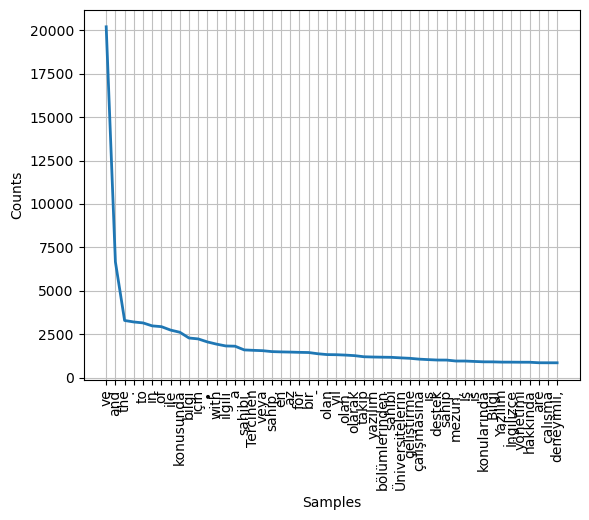

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [78]:
most_common_words = nltk.FreqDist(full_text.split())
most_common_words.plot(50)

In [24]:
'asdasdsCANasdsadas'.replace('can','KEMAL')

'asdasdsCANasdsadas'

|       Method      |                            Functionality                            |
|:------------------|:--------------------------------------------------------------------|
| `s.find(t)`       | index of first instance of   string `t` inside `s` (`-1` if not found)    |
| `s.rfind(t)`      | index of last instance of   string `t` inside `s` (`-1` if not found)     |
| `s.index(t)`      | like `s.find(t)` except it raises `ValueError` if not   found           |
| `s.rindex(t)`     | like `s.rfind(t)` except it raises `ValueError` if not   found          |
| `s.join(text)`    | combine the words of the text into a string using `s` as the glue     |
| `s.split(t)`      | split `s` into a list wherever a `t` is found (whitespace   by default) |
| `s.splitlines()`  | split `s` into a list of strings, one per line                        |
| `s.lower()`       | a lowercased version of the string `s`                                |
| `s.upper()`       | an uppercased version of the string `s`                               |
| `s.title()`       | a titlecased version of the string `s`                                |
| `s.strip()`       | a copy of `s` without leading or trailing whitespace                  |
| `s.replace(t, u)` | replace instances of `t` with `u` inside `s`                              |


In [85]:
tot_chars = sum(len(w) for w in full_text.split())

print("Total number of characters: {}  asdasd as das {}".format(tot_chars, type(tot_chars)))

Total number of characters: 3323942  asdasd as das <class 'int'>


In [83]:
"Total number of characters: " +str(tot_chars) + ' kelime lasda '+ keli + ' '

'Total number of characters: 3323942'

In [87]:
sum(len(w) for w in full_text.split()) / len (full_text.split()) # average word length

6.8318380719246425

In [89]:
tot_na_chars = sum(len(w) for w in full_text.split() if not w.isalnum())
perc_na_chars = tot_na_chars/tot_chars

print("Total number of non-alphanumeric characters: {}".format(tot_na_chars))
print("Percentage of non-alphanumeric characters: {:%}".format(perc_na_chars))

Total number of non-alphanumeric characters: 749016
Percentage of non-alphanumeric characters: 22.533967%


In [90]:
[w for w in full_text.split() if not w.isalnum()]

['08.30',
 '-',
 '18.30',
 'saatleri.',
 'çalışmıyoruz.',
 'Kızılay-',
 'Kolejdedir.',
 '(Zorunlu)',
 'tecrübeli.',
 'vardır.',
 'ayarlama,',
 'paketleme,',
 'alınacaktır.',
 'ediyoruz.',
 'A.Ş.',
 'Yeditek,',
 'göstermektedir.',
 'çalışıyoruz.',
 'problemler;',
 'edilir,',
 'sunulur.',
 'ilanıdır.',
 "Türkiye'de",
 ',',
 'kurumlarda,',
 'sağlayan,',
 'sunar.',
 'sonuçları,',
 'mümkün.',
 'teknolojileri,',
 'anlayışıyla,',
 'Türkiye’nin',
 'sağlamaktadır.',
 '500’e',
 "Uzmanı'",
 'arıyoruz.',
 '•',
 'Tasarımı,',
 'Tasarımı,',
 'TV,',
 'Fakültesi,',
 'mezun,',
 '•',
 'türleri,',
 'sahibi,',
 '•',
 'bilen,',
 'Photoshop,',
 'sahibi,',
 '•',
 'sahibi,',
 '•',
 'sahibi,',
 '•',
 'Kurgu,',
 'ses,',
 'eden,',
 '•',
 'kuvvetli,',
 '•',
 'Tipografi,',
 'sahip,',
 '•',
 'sunabilecek,',
 '•',
 'veren,',
 'açık,',
 'odaklı,',
 'geliştirebilen,',
 '•',
 'sağlayabilecek,',
 '•',
 '•',
 'gerçekleştirilmesi,',
 '•',
 'gerçekleştirilmesi,',
 '•',
 'E-eğitimlerin',
 'yapılması,',
 '•',
 ',',
 'eğitimi,

In [94]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Regular Expression
### A language for specifying search strings in text.

In [98]:
re.findall(r"[Tt]he", "The dog barked at the cat")

['The', 'the']

In [25]:
s = 'GeeksforGeeks: A computer science portal for geeks'
 
match = re.search(r'portal', s)
#defining the pattern
pattern = re.compile(r'portal')
#what does this regex do? 
#search for the word 'portal' in the string s


 
print('Start Index:', match.start())
print('End Index:', match.end())

Start Index: 34
End Index: 40


In [26]:
# A sample text string where regular expression
# is searched.
string = """Hello my Number is 12345678.9 and
            my friend's number is 987654321"""
 
# A sample regular expression to find digits.
regex = '\d+'
 
match = re.findall(regex, string)
print(match)

['12345678', '9', '987654321']


In [101]:
# \d is equivalent to [0-9].
p = re.compile('\d')
print(p.findall("I went to him at 11 A.M. on 4th July 1886"))
 
# \d+ will match a group on [0-9], group
# of one or greater size
p = re.compile('\d+')
print(p.findall("I went to him at 11 A.M. on 4th July 1886"))

['1', '1', '4', '1', '8', '8', '6']
['11', '4', '1886']


In [102]:
# \w is equivalent to [a-zA-Z0-9_].
p = re.compile('\w')
print(p.findall("He said * in some_lang."))
 
# \w+ matches to group of alphanumeric character.
p = re.compile('\w+')
print(p.findall("I went to him at 11 A.M., he \
said *** in some_language."))
 
# \W matches to non alphanumeric characters.
p = re.compile('\W')
print(p.findall("he said *** in some_language."))

['H', 'e', 's', 'a', 'i', 'd', 'i', 'n', 's', 'o', 'm', 'e', '_', 'l', 'a', 'n', 'g']
['I', 'went', 'to', 'him', 'at', '11', 'A', 'M', 'he', 'said', 'in', 'some_language']
[' ', ' ', '*', '*', '*', ' ', ' ', '.']


In [ ]:
/\w*(TR)[\s*]{0,}[0-9\s]{22,}/

In [106]:
from nltk.tokenize import sent_tokenize
text = "Hello everyone Hope all are fine and doing well. Hope you find the book interesting"
print(sent_tokenize(text))

['Hello everyone!', 'Hope all are fine and doing well.', 'Hope you find the book interesting']


## Stemming and Lemmatization

• Many languages have some inflectional and derivational morphology, where similar words have similar forms:  organizes, organized, organizing  
• Stemming and lemmatization reduce this variety to a single common base form.

gözlükçü
gözlük
göz
gözlükçülerimizden - > gözlükçü

-> göz

Gözlükçüye gittim. İki tane gözlük aldım. Gözüm bozulmuş. Göz önemli abi.

Göz gittim. 
İki tane göz aldım.
Göz bozulmuş.
Göz önemli.

go
went

organizes, organized,organizing -> organize

In [112]:
from TurkishStemmer import TurkishStemmer
stemmer = TurkishStemmer()
stemmer.stem("kitaplarımızdaki")

'kitap'

In [118]:
df = [
    ['musteri', 'musteriler', 'cabuk', 'baglaniyorum'],
    ['konuda', 'yardımcı', 'islemlerim', 'islemlerimde']
]
turkStem = TurkishStemmer()
all_stem_lists = []

for word_group in df:
    output_stems = []
    for word in word_group:
        stem = turkStem.stem(word)
        output_stems.append(stem)
    all_stem_lists.append(output_stems)

print(all_stem_lists)

[['muster', 'muster', 'cabuk', 'baglaniyor'], ['konu', 'yardımç', 'islem', 'islem']]


In [120]:
import spacy
nlp = spacy.load('en_core_web_sm')
text='I went to him at 11 A.M. on 4th July 1886. I was hoping to get a response by now. I was hoping to get a response by now. Even though the weather was bad, I went to the gym.'
lemmas=[token.lemma_ for token in nlp(text)]
lemmas

['I',
 'go',
 'to',
 'he',
 'at',
 '11',
 'A.M.',
 'on',
 '4th',
 'July',
 '1886',
 '.',
 'I',
 'be',
 'hope',
 'to',
 'get',
 'a',
 'response',
 'by',
 'now',
 '.',
 'I',
 'be',
 'hope',
 'to',
 'get',
 'a',
 'response',
 'by',
 'now',
 '.',
 'even',
 'though',
 'the',
 'weather',
 'be',
 'bad',
 ',',
 'I',
 'go',
 'to',
 'the',
 'gym',
 '.']